# Geopandas Examples

In [1]:
import geopandas
import rasterio
import pprint
from rasterio import features
import rasterio.plot
import matplotlib.pyplot as plt
from shapely.geometry import Point

In [2]:
# Import raster file
currents = rasterio.open('data/Surface Currents.tif')

In [3]:
# Create sampling points
points = [Point(600000, 4400000), Point(400000, 4600000), Point(600000, 4600000)]
gdf = geopandas.GeoDataFrame(geometry=points, crs=32630)
gdf.head()

,geometry
0,POINT (600000.000 4400000.000)
1,POINT (400000.000 4600000.000)
2,POINT (600000.000 4600000.000)


<AxesSubplot:>

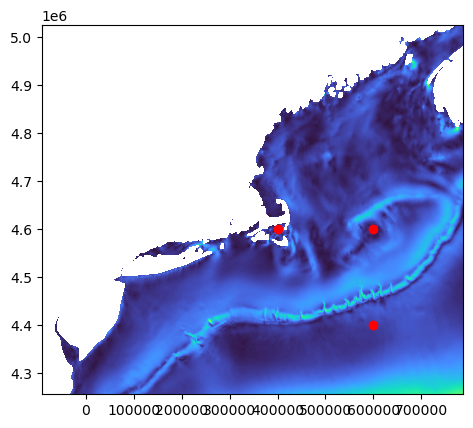

In [4]:
fig, ax = plt.subplots()

# transform rasterio plot to real world coords
extent=[currents.bounds[0], currents.bounds[2], currents.bounds[1], currents.bounds[3]]
ax = rasterio.plot.show(currents, extent=extent, ax=ax, cmap='turbo')

gdf.plot(ax=ax, color='red')

In [5]:
coord_list = [(x,y) for x,y in zip(gdf['geometry'].x , gdf['geometry'].y)]
gdf['value'] = [x for x in currents.sample(coord_list)]
gdf.head()

,geometry,value
0,POINT (600000.000 4400000.000),"[0.070704386, 81.71301]"
1,POINT (400000.000 4600000.000),"[0.08844339, 73.10852]"
2,POINT (600000.000 4600000.000),"[0.04151321, 44.972664]"


In [ ]:
def sample(x, y):
    
    
sample(400000, 4400000)

<AxesSubplot:>

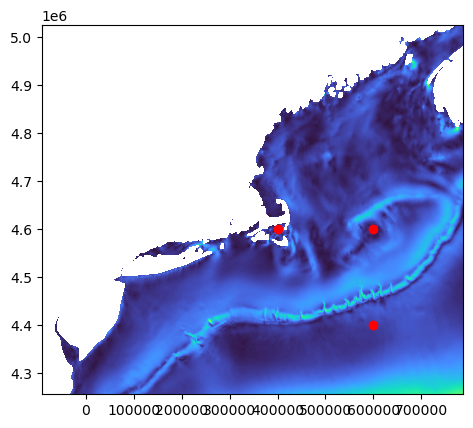

In [6]:
fig, ax = plt.subplots()

# transform rasterio plot to real world coords
extent=[currents.bounds[0], currents.bounds[2], currents.bounds[1], currents.bounds[3]]
ax = rasterio.plot.show(currents, extent=extent, ax=ax, cmap='turbo')

gdf.plot(ax=ax, color='red')

# Notes
* Search for region meeting limits
* Look into conferences for GIS and MSP, next spring or summer
* Arezoo is working on abstract for ISOPE
* Code in modules.py to import local conditions
* add latitude and longitude as design variables to query environmental conditions